# FFNN(Feed Forward Neural Network)
  - 행렬곱 연산은 내적연산의 연속
  - 행렬곱의 의미는 특징 추출, 차원 축소 (복잡 -> 단순(특징))
  - 내적연산의 결과는 크기값이 고려된 사이각 (벡터의 특징)
  - 행렬곱은 정규화가 유리함.

# Tensorflow Mode
  - static mode / dynamic mode ( eager mode )
  - static은 모델을 구성하고, 데이터를 전송. (그래프 구조를 미리 생성하고 실행) => 속도 면에서 유리
  - dynamic은 함수를 실행할 때 그래프 구조가 생성됨. => 속도면에서는 좀 부족하지만, 개발면에서 유리함. (pytorch와 같음)

# Tensorflow + Keras의 관계
   - Tensorflow 1.x에서는 tf가 keras의 backend
   - Tensorflow 2.x에서는 Keras가 tensorflow의 모델 구성 주역
   ( keras가 tf하고만 작업 )
   - Tensorflow 2.16 + Keras 3.0

# GPU 작업

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
print("GPU 사용 가능:", tf.config.list_physical_devices('GPU'))

GPU 사용 가능: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# 자세하게 알아보려면
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 438046678022754742
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14619377664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7829318263742935080
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [5]:
# ndarray() => 다차원의 의미. n dimension.
import numpy as np
import numpy.linalg
A = np.array([[1, -1, 2], [3, 2, 0]])  # 2x3 (2행 3열)
print(A)

v = np.array([1, 2, 3])
print("행 벡터", v)

v = np.array([[2], [1], [3]]) # 3x1
print("3행 1열 벡터", v)

v = np.transpose(np.array([[2, 1, 3]]))
print(v)

w = np.dot(A, v)
print(w)
# 선형대수의 개념이 있는 numpy

[[ 1 -1  2]
 [ 3  2  0]]
행 벡터 [1 2 3]
3행 1열 벡터 [[2]
 [1]
 [3]]
[[2]
 [1]
 [3]]
[[7]
 [8]]


### 데이터는 constant, 가중치는 variable, 기본이 random으로 초기화. (정규분포로 초기화)
 - 학습 개념: 데이터 * 가중치 (행렬곱)

In [6]:
import tensorflow as tf

scalar_constant = tf.constant(10)  # 스칼라 량
vector_constant = tf.constant([1, 2, 3])  # 벡터 1차원
matrix_constant = tf.constant([[1, 2], [3, 4]], dtype = tf.float32) # 2차원 행렬
shaped_constant = tf.constant(5, shape=[2, 2])

print(scalar_constant)
print(vector_constant)
print(matrix_constant)
print(shaped_constant)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5 5]
 [5 5]], shape=(2, 2), dtype=int32)


In [9]:
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape = [3, 3])
y = tf.constant([1.0, 2, -6], shape = [3, 1])
# 3x3  3x1 => 3x1

x_1 = tf.linalg.inv(x)  # inv(x) => 역행렬
z = tf.matmul(x_1, y) # matrix multiply
print(z)  # 3x1
print(2.0 * z[0] + 1.0 * z[1] + 1.0 * z[2])  # tensor 연산결과는 tensor.
# 중요한 건 차수와 데이터 타입. => 타입을 지정하지 않으면, tensorfloew가 자동으로 지정한다.

tf.Tensor(
[[ 1.]
 [-2.]
 [ 1.]], shape=(3, 1), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)


In [10]:
z = tf.linalg.solve(x, y)
print(2.0 * z[0] + 1.0 * z[1] + 1.0 * z[2])

tf.Tensor([1.], shape=(1,), dtype=float32)


### 구구단 만들기

In [12]:
# Tensor 데이터 타입
# Tensorflow => Numpy로 변환
def gugu(dan):
  level = tf.constant(dan)  # 상수 -> 데이터
  state = tf.Variable(0)  # 변수 -> 가중치
  for _ in range(9):  # 횟수 (_는 마지막 계산된 결과가 저장되는 곳)
    state.assign_add(1)  # => 1
    result = level * state
    print('{} x {} = {:2}'.format(level.numpy(), state.numpy(), result.numpy()))

for _ in range(2):
  gugu(_)

0 x 1 =  0
0 x 2 =  0
0 x 3 =  0
0 x 4 =  0
0 x 5 =  0
0 x 6 =  0
0 x 7 =  0
0 x 8 =  0
0 x 9 =  0
1 x 1 =  1
1 x 2 =  2
1 x 3 =  3
1 x 4 =  4
1 x 5 =  5
1 x 6 =  6
1 x 7 =  7
1 x 8 =  8
1 x 9 =  9


In [17]:
tensor = tf.constant([[1., 2], [3, 4]], name = 'my_tensor')
numpy_array = tensor.numpy()
print(type(numpy_array))
print(numpy_array)
print(tensor.device)  # GPU
print(tf.transpose(tensor)) # transpose: 전치
print(tf.transpose(numpy_array)) # numpy_array 넣어도 호환됨.

<class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]]
/job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 3.]
 [2. 4.]], shape=(2, 2), dtype=float32)


### Tensor의 타입

In [18]:
print(tensor.dtype)  # 데이터에 따라 자동으로 타입 지정
print(tensor.shape)

<dtype: 'float32'>
(2, 2)


### 고유값 분해

In [19]:
a = tf.constant([[1, 2], [2, 1]], dtype = tf.float32)  # 정방 행렬
eigenvalues, eigenvectors = tf.linalg.eig(a)  # eigen => 고유값 분해 (고유치, 고유벡터 도출)
print(eigenvalues)  # 고유치 -> 고유벡터 방향으로의 분산 값
print(eigenvectors)

tf.Tensor([ 2.9999998 +0.j -0.99999994+0.j], shape=(2,), dtype=complex64)
tf.Tensor(
[[ 0.7071068+0.j -0.7071068+0.j]
 [ 0.7071068+0.j  0.7071068+0.j]], shape=(2, 2), dtype=complex64)


### 특이행렬분해 (singula, value, decomposition)

In [20]:
# 3x2
# u, s, v
# 3x3 행렬이 나오고 s는 3, v는 2x2 (가운데가 특이치)

a = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32)
s, u, v = tf.linalg.svd(a)
print(s)
print(u)
print(v)

tf.Tensor([9.525519  0.5143015], shape=(2,), dtype=float32)
tf.Tensor(
[[-0.22984788  0.8834613 ]
 [-0.52474487  0.24078184]
 [-0.819642   -0.40189582]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[-0.6196294 -0.7848945]
 [-0.7848945  0.6196294]], shape=(2, 2), dtype=float32)


### 원본으로 되돌리기

In [22]:
# 행렬곱의 의미

a_reconstructed = u @ tf.linalg.diag(s) @ tf.transpose(v)
print("\n복원된 행렬 a_reconstructed:")
print(a_reconstructed)


복원된 행렬 a_reconstructed:
tf.Tensor(
[[1.0000002 2.0000024]
 [3.0000002 4.0000014]
 [5.0000005 6.0000014]], shape=(3, 2), dtype=float32)


### 벡터의 크기 계산

In [23]:
a = tf.constant([[1, 2], [3, 4]], dtype = tf.float32)
norm_l1 = tf.linalg.norm(a, ord=1)  # L1 절댓값 거리
norm_l2 = tf.linalg.norm(a, ord=2)  # L2 피타고라스 거리
print(norm_l1)
print(norm_l2)

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(5.4772253, shape=(), dtype=float32)


### 벡터에 대하여

In [26]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2, 3, 5])

def showvalue(t):  # 변환함수
  print(t.numpy())
showvalue(c2)

[1.2 5.6]


In [27]:
showvalue(tf.add_n([c2, v2]))
showvalue(tf.add_n([c3, v3, v3]))
showvalue(tf.abs(c2))
showvalue(tf.negative(c2))

[ 3.5 10.1]
[-8  5 17]
[1.2 5.6]
[-1.2 -5.6]


In [28]:
showvalue(tf.sign([c2]))
showvalue(tf.sqrt(tf.cast(v3, tf.float64)))

# math 초월함수
# 요소 각각에 대해서 계산
# tf.cast 함수로 데이터 타입 변경
showvalue(tf.math.log(tf.cast(v3, tf.float64)))  # 로그
showvalue(tf.math.exp(tf.cast(v3, tf.float64)))  # 지수
showvalue(tf.math.square(c2))
showvalue(tf.math.round(c2))
showvalue(tf.math.pow(c2, 2))
showvalue(tf.math.cos(c2))  # 삼각함수

[[1. 1.]]
[       nan 1.73205081 2.23606798]
[       nan 1.09861229 1.60943791]
[1.35335283e-01 2.00855369e+01 1.48413159e+02]
[ 1.44     31.359999]
[1. 6.]
[ 1.4400002 31.359999 ]
[0.36235774 0.77556586]


### 초기화 함수

In [31]:
print(tf.zeros(2))  # ones, fill과 같은....
a = tf.ones(2)  # 또는 zeros
print(a.numpy())  # ndarray로 출력
print(a.shape)  # 차수 3, 3 (2차원)
print(tf.size(a))  # 요소의 개수 9
print(tf.rank(a))  # 차원 (1)

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
[1. 1.]
(2,)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 가중치를 랜덤으로 초기화

In [32]:
# tensorflow 2.0으로 바뀌면서
# numpy, scikits, pandas의 좋은 점은 다 가지고 옴.
# math, linalg, random

zeros_tensor = tf.zeros([2, 3])
print("Zeros Tensor:", zeros_tensor)

random_normal_tensor = tf.random.normal([3, 4], mean = 0.0, stddev = 1.0)
print("Random Normal Tensor:", random_normal_tensor)

# 모델에서 사용 (tensorflow 2.x에서 모델 구성은 keras)
# Variable 초기화 -> 중요한 이유! 가중치가 저장되기 때문에, random으로 하는 것보다 keras에 있는 initializer로 학습하면 더 잘 되는 것.
# stddev = sqrt(2 / fan_in), 중심이 0 => 학습이 더 잘됨 (데이터가 작아짐.)
he_initializer = tf.keras.initializers.HeNormal()
he_tensor = he_initializer(shape=[2, 2])
print("He Tensor:", he_tensor)

Zeros Tensor: tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
Random Normal Tensor: tf.Tensor(
[[-1.4228759   0.33994243 -0.16748749 -0.82679087]
 [ 0.50473744  1.9311608  -0.9882022   1.0551598 ]
 [ 0.29255065  1.2785789   0.39878064  0.34731275]], shape=(3, 4), dtype=float32)
He Tensor: tf.Tensor(
[[-0.63809526  1.8851229 ]
 [ 0.24531236  0.7286716 ]], shape=(2, 2), dtype=float32)


### tensor에 있는 내용을 numpy로 바꾼 다음에.. 시각화 해보기

In [33]:
def run_variable(variable):
  return variable.numpy()

# Tensor
my_distribution = tf.random.uniform((600, 400), seed=42)
uniform = run_variable(my_distribution)
uniform

array([[0.95227146, 0.67740774, 0.79531825, ..., 0.5852872 , 0.00588107,
        0.9513891 ],
       [0.19276583, 0.5273739 , 0.14597082, ..., 0.4798677 , 0.77461815,
        0.81459403],
       [0.7998823 , 0.6596427 , 0.69284487, ..., 0.40781522, 0.983263  ,
        0.7197592 ],
       ...,
       [0.04704869, 0.28554296, 0.99592566, ..., 0.92196083, 0.7676239 ,
        0.43214214],
       [0.67130876, 0.12011135, 0.9083421 , ..., 0.605654  , 0.61382556,
        0.27784765],
       [0.74221396, 0.96676755, 0.8914833 , ..., 0.7696043 , 0.41860378,
        0.26309812]], dtype=float32)

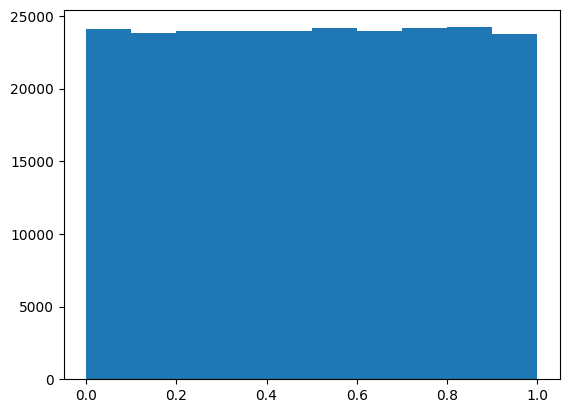

In [34]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten())
plt.show()

### 정규분포

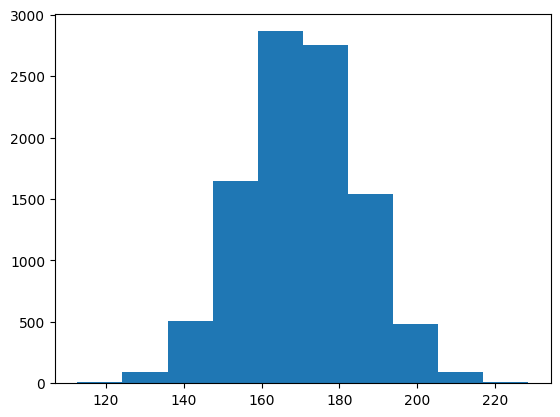

In [35]:
# random은 분포
# 의사난수

distribution = tf.random.normal((10000, ), seed = 42, mean = 170, stddev = 15)
normal = run_variable(distribution)
plt.hist(normal.flatten())
plt.show()

### 문제 1: 두 tensor를 행렬곱하여 ndarray로 출력하시오.

In [37]:
 a = tf.constant([1, 2, 3, 4, 5, 6], shape = [2, 3])
 b = tf.constant([7, 8, 9, 10, 11, 12], shape = [3, 2])

 c = tf.matmul(a, b)
print(c.numpy())

d = tf.matmul(b, a)
print(d.numpy())

[[ 58  64]
 [139 154]]
[[ 39  54  69]
 [ 49  68  87]
 [ 59  82 105]]


### 문제 1-1: [1, 2, 3, 4, 5, 6] 벡터를 [2, 3] 상수행렬로 선언하고 거듭제곱한 값을 출력해보시오.

In [39]:
import tensorflow as tf
x1 = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
x2 = tf.transpose(x1)
result = tf.matmul(x1, x2)
result.numpy()
result.numpy()

array([[14, 32],
       [32, 77]], dtype=int32)

### 문제 1-2: 다음 데이터를 대각행렬로 만드시오,

In [40]:
diagonal = [1, 2, 3, 4]
print(tf.linalg.diag(diagonal))

tf.linalg.diag_part(tf.linalg.diag(diagonal)).numpy()

tf.Tensor(
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]], shape=(4, 4), dtype=int32)


array([1, 2, 3, 4], dtype=int32)

In [41]:
tf.linalg.diag_part(tf.linalg.diag(diagonal)).numpy()

array([1, 2, 3, 4], dtype=int32)

In [42]:
a = tf.range(6, dtype=tf.int32)
print("a   :", a)

a_2d = tf.reshape(a, (2, 3))  # 차수
print("a_2d:", a_2d)

a_3d = tf.expand_dims(a_2d, 0)  # 열이 행으로 차원을 확대 (뒤에서 추가함)
print("a_3d:", a_3d)

a_4d = tf.expand_dims(a_3d, 0)  # 차원만 증가 (앞에서 추가함)
print("a_4d:", a_4d)

a_1d = tf.squeeze(a_4d)  # 1인 차원을(축소 요소가 1인 차원) 축소
print("a_1d:", a_1d)

a   : tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)
a_2d: tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)
a_3d: tf.Tensor(
[[[0 1 2]
  [3 4 5]]], shape=(1, 2, 3), dtype=int32)
a_4d: tf.Tensor(
[[[[0 1 2]
   [3 4 5]]]], shape=(1, 1, 2, 3), dtype=int32)
a_1d: tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)


### CNN padding 연산
  - CNN에서는 차수를 유지하기 위해서 패딩을 취함.
  - 원래 이미지 사이즈를 유지하기 위해서 채워서 진행하는 것.
  (이렇게 채운 이미지는 마지막 이미지가 중요할 때, 즉 가장자리가 의미있을 때 채워서 연산한다.)

In [43]:
 t = [[1, 2, 3], [4, 5, 6]]
 paddings = [[1, 1], [2, 2]]
 tf.pad(t, paddings, "CONSTANT")

<tf.Tensor: shape=(4, 7), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

### reflect

In [44]:
paddings = [[1, 1], [2, 2]]
print(tf.pad(t, paddings, "REFLECT"))  # 거울에 비친 것처럼

tf.Tensor(
[[6 5 4 5 6 5 4]
 [3 2 1 2 3 2 1]
 [6 5 4 5 6 5 4]
 [3 2 1 2 3 2 1]], shape=(4, 7), dtype=int32)


### stmmentric

In [45]:
print(tf.pad(t, paddings, "SYMMETRIC"))  # 대칭으로 복사

tf.Tensor(
[[2 1 1 2 3 3 2]
 [2 1 1 2 3 3 2]
 [5 4 4 5 6 6 5]
 [5 4 4 5 6 6 5]], shape=(4, 7), dtype=int32)


### concat

In [46]:
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
print(tf.concat([t1, t2], 0).numpy())  # 행렬을 결합할 때
print(tf.concat([t1, t2], 1).numpy())

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


### Relu
  - activation function (활성화 함수)

In [48]:
import numpy as np

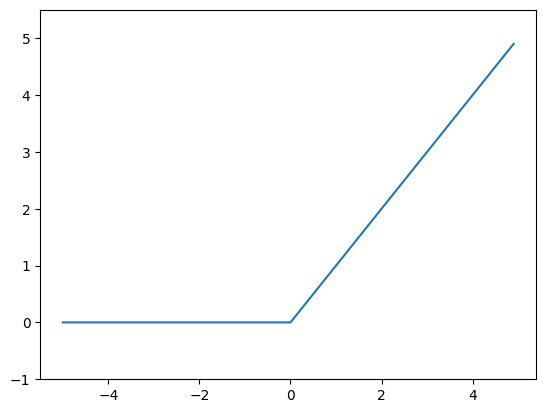

In [49]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)  # Leaky relu ( -1까지만 고려됨. )

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### softmax

In [51]:
scores = [3.0, 1.0, 0.2]  # 다중분류 (3가지)

def softmax(x):  # (다중분류에서 scores 값을) 확률값으로 변환시켜주는 게 softmax.
  return np.exp(x) / np.sum(np.exp(x), axis = 0)  # exp: 지수 취함 (큰 건 더 크게하고, 작은 건 더 작게하기 위함.)

In [52]:
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [53]:
sum(softmax(scores))

np.float64(0.9999999999999999)

# 회귀
  - cost function = (실제값 - 예측값) ^ 2

###Loss 함수

In [54]:
# loss 함수 # 크로스 엔트로피
# 다중분류

answer = [1.0, 0.0, 0.0]  # 실제값
probabilities = tf.nn.softmax(scores)  # 예측 확률값
cross_entropy_loss = tf.keras.losses.categorical_crossentropy(
    answer, probabilities)

cross_entropy_loss  # numpy=0.1791

<tf.Tensor: shape=(), dtype=float32, numpy=0.17910417914390564>

In [55]:
probabilities  # 잘 예측하고 있으면 비용이 작아야 한다! => 역관계

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.83601874, 0.11314283, 0.05083835], dtype=float32)>

In [57]:
tf.math.log(
    [0.83601874, 0.11314283, 0.05083835]
)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.17910425, -2.1791043 , -2.9791043 ], dtype=float32)>

In [56]:
# 안에서는 이런 일이 벌어졌다~  # probabilities 값을 다 더하면 1이 됨.
# 크로스 엔트로피가 이렇게 계산해주는 아이다~ (역관계 표현(확률 값을 손실 값으로 변환하는 역할))

- sum([1.0, 0.0, 0.0] * tf.math.log(
    [0.83601874, 0.11314283, 0.05083835]
))

<tf.Tensor: shape=(), dtype=float32, numpy=0.1791042536497116>